In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [121]:
boston_data = load_boston()

In [122]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
X = boston[['DIS', 'AGE']]
Y = boston[['MEDV']]
X = X.to_numpy()
Y = Y.to_numpy()

Text(0.5, 0, 'MEDV')

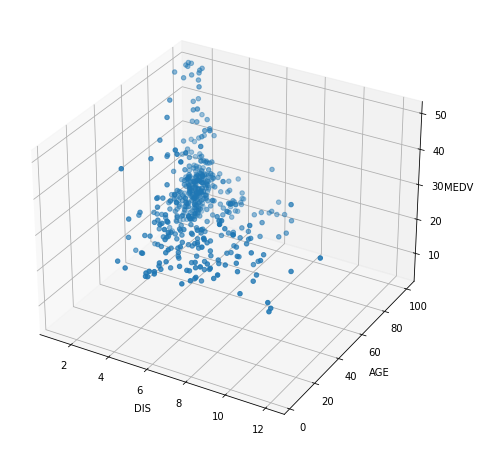

In [134]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel("DIS")
ax.set_ylabel("AGE")
ax.set_zlabel("MEDV")

In [135]:
slope = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
slope

array([[3.23345916],
       [0.1364118 ]])

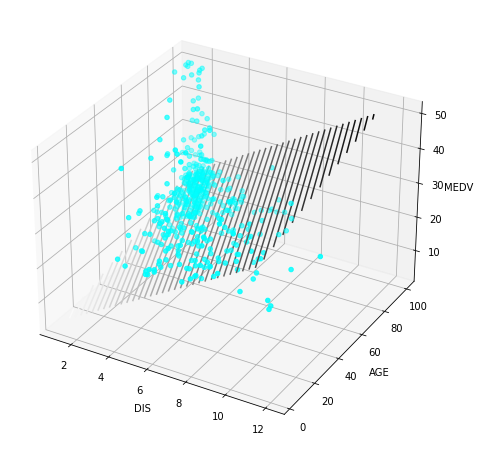

In [136]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1,projection='3d')

x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())

x, y = np.meshgrid(x_range, y_range)

z = x * slope[0] + y * slope[1]
ax.contour3D(x, y, z, 50, cmap='binary')
ax.scatter(X[:,0],X[:,1],Y, c="cyan")
ax.set_xlabel("DIS")
ax.set_ylabel("AGE")
ax.set_zlabel("MEDV")
plt.show()